In [2]:
from bs4 import BeautifulSoup as bs
import requests
import pandas as pd
import spotipy
import spotipy.util as util
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy.oauth2 as oauth2

In [3]:
market = [ "AD", "AR", "AT", "AU", "BE", "BG", "BO", "BR", "CA", "CH", "CL", "CO", "CR", "CY", 
      "CZ", "DE", "DK", "DO", "EC", "EE", "ES", "FI", "FR", "GB", "GR", "GT", "HK", "HN", "HU", 
      "ID", "IE", "IS", "IT", "JP", "LI", "LT", "LU", "LV", "MC", "MT", "MX", "MY", "NI", "NL", 
      "NO", "NZ", "PA", "PE", "PH", "PL", "PT", "PY", "SE", "SG", "SK", "SV", "TH", "TR", "TW", 
      "US", "UY", "VN" ]
CLIENT_ID ='d93af13f2f6343c4b7d9e81ba8f29663' 
CLIENT_SECRET = '96842fd0fdc74a739bd6d82c176b090b'

credentials = oauth2.SpotifyClientCredentials(
        client_id=CLIENT_ID,
        client_secret=CLIENT_SECRET)

token = credentials.get_access_token()
sp = spotipy.Spotify(auth=token)

In [4]:
response=requests.get('http://www.popvortex.com/music/charts/top-rap-songs.php')
soup=bs(response.content,'html.parser')
titles=soup.findAll('cite',{'class':'title'})
artists=soup.findAll('em',{'class':'artist'})
art,tit=[],[]
for t,a in zip(titles,artists):
    art.append(a.text)
    tit.append(t.text)
dic={'artist':art,'title':tit}

In [5]:
df=pd.DataFrame(dic)
df['artist'][19]='Juice WRLD'
df['artist'][21]='Russ'
df['artist'][23]='True Damage'
df['artist'][4]='Post Malone'
df['artist'][27]='Quality Control'
df['artist'][70]='Tyga'
df['artist'][75]='Cardi B'
df['artist'][76]='Mustard'
df['artist'][81]='Macklemore'
df['artist'][83]='Moneybagg Yo'
df['artist'][35]='Lil Nas X'
df['title'][42]='Restroom Occupied'
df['artist'][44]='Iggy Azalea'
df['title'][55]='Easy'
df['artist'][56]='Fat Joe'
df['artist'][58]='Upchurch'
df['title'][12]='Money In The Grave'
df['title'][13]='Ballin’'
df['title'][23]=df['title'][23][:6]
df['title'][25]=df['title'][23][:10]
df['title'][77]='Stainless'
df['title'][80]='Use This Gospel'
df['title'][81]='Cant Hold Us'
df['title'][82]='Till I Collapse'
df['title'][85]='Ballin’'
df['title'][86]='California Love'
df['title'][92]='Love the Way You Lie'
df['title'][99]='Gangstas Paradise'
df['title'][56]='YES'
df['title'][34]='Hollywoods Bleeding'
df['artist'][63]='Lil Peep'
df['title'][31]='223s'

In [6]:
info=[]
for a,t in zip(df.artist,df.title):
    p=sp.search(q='artist:' + a.lower() + ' track:' + t.lower(), type='track')
    try:
        info.append(p['tracks']['items'][0])
    except:
        info.append('NAN') 

In [7]:
uris=[]
for i in range(0,100):
    try:
        uris.append(info[i]['uri'])
    except:
        uris.append(info[i])

In [8]:
df['uris']=uris

In [9]:
df=df[df['uris']!='NAN']

In [10]:
df.head()

,artist,title,uris
0,Post Malone,Circles,spotify:track:21jGcNKet2qwijlDFuPiPb
1,Post Malone,Take What You Want (feat. Ozzy Osbourne & Trav...,spotify:track:7CZyCXKG6d5ALeq41sLzbw
2,Arizona Zervas,Roxanne,spotify:track:1ZPWWSwCkxKfqdp4H0RFCo
3,DaBaby,BOP,spotify:track:6Ozh9Ok6h4Oi1wUSLtBseN
4,Post Malone,Sunflower (Spider-Man: Into the Spider-Verse),spotify:track:3KkXRkHbMCARz0aVfEt68P
5,Travis Scott,HIGHEST IN THE ROOM,spotify:track:3eekarcy7kvN4yt5ZFzltW
6,Kanye West,Follow God,spotify:track:2QpGZOhTCHHiKmpSO9FW4h
7,NF,Time,spotify:track:6MxMqCgqmekcr0VwSU7AVH
8,Post Malone,Goodbyes (feat. Young Thug),spotify:track:0t3ZvGKlmYmVsDzBJAXK8C
9,Tyga,Ayy Macarena,spotify:track:6LcauUZjF1eXQrgqMUecHX


In [11]:
dance,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration=[],[],[],[],[],[],[],[],[],[],[],[]
delete=[]
for u in df.uris:
    feats=sp.audio_features(u)[0]
    dance.append(feats['danceability'])
    energy.append(feats['energy'])
    key.append(feats['key'])
    loudness.append(feats['loudness'])
    mode.append(feats['mode'])
    speechiness.append(feats['speechiness'])
    acousticness.append(feats['acousticness'])
    instrumentalness.append(feats['instrumentalness'])
    liveness.append(feats['liveness'])
    valence.append(feats['valence'])
    tempo.append(feats['tempo'])
    duration.append(feats['duration_ms'])

In [12]:
df['dance']=dance
df['energy']=energy
df['key']=key
df['loudness']=loudness
df['mode']=mode
df['speechiness']=speechiness
df['acousticness']=acousticness
df['instrumentalness']=instrumentalness
df['liveness']=liveness
df['valence']=valence
df['tempo']=tempo
df['duration']=duration

In [14]:
df.reset_index(inplace=True)
df.rename(columns={'index':'rank'},inplace=True)
df

,rank,artist,title,uris,dance,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration
0,0,Post Malone,Circles,spotify:track:21jGcNKet2qwijlDFuPiPb,0.695,0.762,0,-3.497,1,0.0395,0.192000,0.002440,0.0863,0.5530,120.042,215280
1,1,Post Malone,Take What You Want (feat. Ozzy Osbourne & Trav...,spotify:track:7CZyCXKG6d5ALeq41sLzbw,0.499,0.800,1,-2.665,0,0.0502,0.090600,0.000000,0.1470,0.2720,139.919,229573
2,2,Arizona Zervas,Roxanne,spotify:track:1ZPWWSwCkxKfqdp4H0RFCo,0.621,0.601,6,-5.616,0,0.1480,0.052200,0.000000,0.4600,0.4570,116.735,163636
3,3,DaBaby,BOP,spotify:track:6Ozh9Ok6h4Oi1wUSLtBseN,0.769,0.787,11,-3.909,1,0.3670,0.189000,0.000000,0.1290,0.8360,126.770,159715
4,4,Post Malone,Sunflower (Spider-Man: Into the Spider-Verse),spotify:track:3KkXRkHbMCARz0aVfEt68P,0.760,0.479,2,-5.574,1,0.0466,0.556000,0.000000,0.0703,0.9130,89.911,158040
5,5,Travis Scott,HIGHEST IN THE ROOM,spotify:track:3eekarcy7kvN4yt5ZFzltW,0.598,0.427,7,-8.764,0,0.0317,0.054600,0.000006,0.2100,0.0605,76.469,175721
6,6,Kanye West,Follow God,spotify:track:2QpGZOhTCHHiKmpSO9FW4h,0.529,0.900,1,-3.503,1,0.4180,0.000248,0.000012,0.0426,0.4340,180.291,104591
7,7,NF,Time,spotify:track:6MxMqCgqmekcr0VwSU7AVH,0.677,0.688,0,-4.058,0,0.0633,0.138000,0.000000,0.1140,0.1980,98.049,240429
8,8,Post Malone,Goodbyes (feat. Young Thug),spotify:track:0t3ZvGKlmYmVsDzBJAXK8C,0.548,0.653,5,-3.875,1,0.0810,0.456000,0.000000,0.1030,0.1630,150.068,174853
9,9,Tyga,Ayy Macarena,spotify:track:6LcauUZjF1eXQrgqMUecHX,0.816,0.630,2,-5.568,1,0.2260,0.133000,0.000000,0.0692,0.7150,96.493,131607


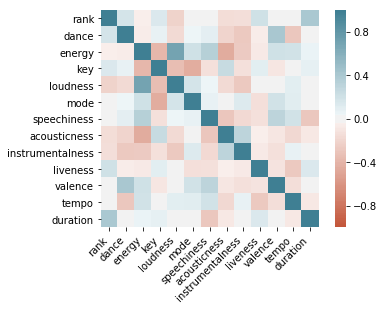

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [22]:
df.sort_values(['rank'])

,rank,artist,title,uris,dance,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration
0,0,Post Malone,Circles,spotify:track:21jGcNKet2qwijlDFuPiPb,0.695,0.762,0,-3.497,1,0.0395,0.192000,0.002440,0.0863,0.5530,120.042,3.588000
1,1,Post Malone,Take What You Want (feat. Ozzy Osbourne & Trav...,spotify:track:7CZyCXKG6d5ALeq41sLzbw,0.499,0.800,1,-2.665,0,0.0502,0.090600,0.000000,0.1470,0.2720,139.919,3.826217
2,2,Arizona Zervas,Roxanne,spotify:track:1ZPWWSwCkxKfqdp4H0RFCo,0.621,0.601,6,-5.616,0,0.1480,0.052200,0.000000,0.4600,0.4570,116.735,2.727267
3,3,DaBaby,BOP,spotify:track:6Ozh9Ok6h4Oi1wUSLtBseN,0.769,0.787,11,-3.909,1,0.3670,0.189000,0.000000,0.1290,0.8360,126.770,2.661917
4,4,Post Malone,Sunflower (Spider-Man: Into the Spider-Verse),spotify:track:3KkXRkHbMCARz0aVfEt68P,0.760,0.479,2,-5.574,1,0.0466,0.556000,0.000000,0.0703,0.9130,89.911,2.634000
5,5,Travis Scott,HIGHEST IN THE ROOM,spotify:track:3eekarcy7kvN4yt5ZFzltW,0.598,0.427,7,-8.764,0,0.0317,0.054600,0.000006,0.2100,0.0605,76.469,2.928683
6,6,Kanye West,Follow God,spotify:track:2QpGZOhTCHHiKmpSO9FW4h,0.529,0.900,1,-3.503,1,0.4180,0.000248,0.000012,0.0426,0.4340,180.291,1.743183
7,7,NF,Time,spotify:track:6MxMqCgqmekcr0VwSU7AVH,0.677,0.688,0,-4.058,0,0.0633,0.138000,0.000000,0.1140,0.1980,98.049,4.007150
8,8,Post Malone,Goodbyes (feat. Young Thug),spotify:track:0t3ZvGKlmYmVsDzBJAXK8C,0.548,0.653,5,-3.875,1,0.0810,0.456000,0.000000,0.1030,0.1630,150.068,2.914217
9,9,Tyga,Ayy Macarena,spotify:track:6LcauUZjF1eXQrgqMUecHX,0.816,0.630,2,-5.568,1,0.2260,0.133000,0.000000,0.0692,0.7150,96.493,2.193450


In [20]:
df.duration=df.duration/60000

In [32]:
cols=list(df.columns[4:])
cols.append('rank')

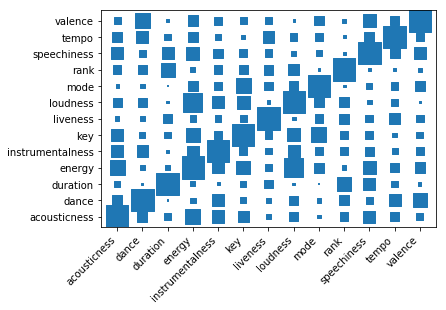

In [33]:
def heatmap(x, y, size):
    fig, ax = plt.subplots()
    
    # Mapping from column names to integer coordinates
    x_labels = [v for v in sorted(x.unique())]
    y_labels = [v for v in sorted(y.unique())]
    x_to_num = {p[1]:p[0] for p in enumerate(x_labels)} 
    y_to_num = {p[1]:p[0] for p in enumerate(y_labels)} 
    
    size_scale = 500
    ax.scatter(
        x=x.map(x_to_num), # Use mapping for x
        y=y.map(y_to_num), # Use mapping for y
        s=size * size_scale, # Vector of square sizes, proportional to size parameter
        marker='s' # Use square as scatterplot marker
    )
    
    # Show column labels on the axes
    ax.set_xticks([x_to_num[v] for v in x_labels])
    ax.set_xticklabels(x_labels, rotation=45, horizontalalignment='right')
    ax.set_yticks([y_to_num[v] for v in y_labels])
    ax.set_yticklabels(y_labels)
    
# data = pd.read_csv('https://raw.githubusercontent.com/drazenz/heatmap/master/autos.clean.csv')
columns = cols
corr = df[columns].corr()
corr = pd.melt(corr.reset_index(), id_vars='index') # Unpivot the dataframe, so we can get pair of arrays for x and y
corr.columns = ['x', 'y', 'value']
heatmap(
    x=corr['x'],
    y=corr['y'],
    size=corr['value'].abs()
)